In [ ]:
# Sources:
# Eckert, S. C. (2021). Introduction to Topic Modeling. IntroDHSpring2021. https://github.com/sceckert/IntroDHSpring2021/blob/main/_week9/introduction-to-topic-modeling.ipynb

In [ ]:
!pip install little_mallet_wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [ ]:
# upload male and female corpora

import zipfile
from google.colab import files

uploaded = files.upload()

Saving data_refined.zip to data_refined.zip


In [ ]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting data_refined.zip

Here is a directory listing (you should see a directory with your corpus):
total 124332
drwxr-xr-x 4 root root      4096 May  1 11:36 data_refined
-rw-r--r-- 1 root root 127303193 May  1 11:36 data_refined.zip
drwxr-xr-x 3 root root      4096 May  1 11:36 __MACOSX
drwxr-xr-x 1 root root      4096 Apr 27 13:35 sample_data


In [ ]:
uploaded = files.upload()

Saving results.zip to results.zip


In [ ]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting results.zip

Here is a directory listing (you should see a directory with your corpus):
total 338748
drwxr-xr-x 4 root root      4096 May  1 11:36 data_refined
-rw-r--r-- 1 root root 127303193 May  1 11:36 data_refined.zip
drwxr-xr-x 4 root root      4096 May  1 11:55 __MACOSX
drwxr-xr-x 4 root root      4096 May  1 11:55 results
-rw-r--r-- 1 root root 219555712 May  1 11:55 results.zip
drwxr-xr-x 1 root root      4096 Apr 27 13:35 sample_data


In [ ]:
num_topics = 15

In [ ]:
files = glob.glob(f"data_refined/female/*.txt")
novel_titles_female = [Path(file).stem for file in files]

path_to_topic_distributions_female = f"results/female/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_female = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_female)

path_to_topic_keys_female = f"results/female/mallet.topic_keys.{str(num_topics)}"
topics_female = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_female)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.update(["would", "could", "said", "illinois"])
stop_words = list(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
training_data_female = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove', stop_words=stop_words)
    training_data_female.append(processed_text)

In [ ]:
training_data_titles_female = dict(zip(training_data_female, novel_titles_female))

In [ ]:
number_of_documents = 5
for topic_number in range(num_topics):
  print(f"Topic {topic_number}: {topics_female[topic_number]}\n")
  for probability, document in little_mallet_wrapper.get_top_docs(training_data_female, topic_distributions_female, topic_number, n=number_of_documents):
    print(round(probability, 4), training_data_titles_female[document] + "\n")

Topic 0: ['lady', 'mother', 'one', 'poor', 'thou', 'good', 'queen', 'sir', 'honor', 'mona', 'dorothy', 'little', 'dick', 'lorraine', 'see', 'child', 'stephen', 'must', 'aut', 'young']

0.4364 RiddellMrsJH__SusanDrummondanovel

0.3953 CrommelinMay__VioletVyvianMFH

0.3535 WalfordLucyBethia__Astiffneckedgeneration

0.2362 CareyRosaNouchette__QueenieswhimanovelByRosaNouchetteCareyInthreevolumes

0.2126 SartorisAdelaideKemble__Pasthours

Topic 1: ['sir', 'philip', 'lady', 'face', 'vera', 'know', 'see', 'little', 'one', 'room', 'come', 'stella', 'say', 'madge', 'old', 'erica', 'dear', 'answered', 'tell', 'man']

0.2769 MarryatFlorence__Howtheylovedhimanovel

0.2614 WoodMrsHenry__LadyGraceandotherstories

0.2488 CluttonBrockEllen__Marjoryastudy

0.2419 RiddellMrsJH__ThegovernmentofficialAnovel

0.22 BethamWalter__Nextofkinwantedanovel

Topic 2: ['one', 'eyes', 'love', 'upon', 'face', 'like', 'life', 'heart', 'yet', 'seemed', 'little', 'hand', 'still', 'man', 'voice', 'long', 'words', 'woman'

In [ ]:
from collections import defaultdict

In [ ]:
topics_works_female = defaultdict(list)
for topic_number in range(num_topics):
  key = f"Topic {topic_number}: {topics_female[topic_number]}\n"
  for probability, document in little_mallet_wrapper.get_top_docs(training_data_female, topic_distributions_female, topic_number, n=1):
    if probability < 0.5:
      break
    topics_works_female[key] = [round(probability, 4), training_data_titles_female[document]]

In [ ]:
files = glob.glob(f"data_refined/male/*.txt")
novel_titles_male = [Path(file).stem for file in files]

path_to_topic_distributions_male = f"results/male/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_male = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_male)

path_to_topic_keys_male = f"results/male/mallet.topic_keys.{str(num_topics)}"
topics_male = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_male)

In [ ]:
path_to_topic_weights_female = f"results/female/mallet.topic_weights.{str(num_topics)}"
topic_weights_female = little_mallet_wrapper.load_topic_word_distributions(path_to_topic_weights_female)


In [ ]:
topic_divergence_female = float("-inf")
topic_pairs_female = []

for i in range(num_topics):
  for j in range(i + 1, num_topics):
    topic_div = little_mallet_wrapper.get_js_divergence_topics(i, j, topic_weights_female)
    if topic_div >= topic_divergence_female:
      topic_divergence_female = topic_div
      topic_pairs_female = [i, j]

print(topic_divergence_female)
print(topic_pairs_female)

0.7119214054139558
[2, 4]


In [ ]:
topic_divergence_female = float("inf")
topic_pairs_female = []

for i in range(num_topics):
  for j in range(i + 1, num_topics):
    topic_div = little_mallet_wrapper.get_js_divergence_topics(i, j, topic_weights_female)
    if topic_div <= topic_divergence_female:
      topic_divergence_female = topic_div
      topic_pairs_female = [i, j]

print(topic_divergence_female)
print(topic_pairs_female)

0.39660398140071346
[5, 13]


In [ ]:
document_divergence_female = float("-inf")
document_pairs_female = []

for i in range(num_topics):
  for j in range(i + 1, num_topics):
    document_div = little_mallet_wrapper.get_js_divergence_documents(i, j, topic_distributions_female)
    if document_div >= document_divergence_female:
      document_divergence_female = document_div
      document_pairs_female = [i, j]

print(document_divergence_female)
print(document_pairs_female)

0.622261862941012
[0, 14]


In [ ]:
path_to_topic_weights_male = f"results/male/mallet.topic_weights.{str(num_topics)}"
topic_weights_male = little_mallet_wrapper.load_topic_word_distributions(path_to_topic_weights_male)

In [ ]:
topic_divergence_male = float("-inf")
topic_pairs_male = []

for i in range(num_topics):
  for j in range(i + 1, num_topics):
    topic_div = little_mallet_wrapper.get_js_divergence_topics(i, j, topic_weights_male)
    if topic_div >= topic_divergence_male:
      topic_divergence_male = topic_div
      topic_pairs_male = [i, j]

print(topic_divergence_male)
print(topic_pairs_male)

0.7152089790878209
[9, 13]


In [ ]:
topic_divergence_male = float("inf")
topic_pairs_male = []

for i in range(num_topics):
  for j in range(i + 1, num_topics):
    topic_div = little_mallet_wrapper.get_js_divergence_topics(i, j, topic_weights_male)
    if topic_div <= topic_divergence_male:
      topic_divergence_male = topic_div
      topic_pairs_male = [i, j]

print(topic_divergence_male)
print(topic_pairs_male)

0.5066614411942418
[8, 14]


In [ ]:
num_common = float("inf")
res = []
for i in range(num_topics):
  words_female = set(topics_female[i])
  for j in range(i + 1, num_topics):
    common = 0
    words_male = set(topics_male[j])
    temp = set(topics_male[j])

    for k in temp:
      if k in words_female:
        words_female.remove(k)
        words_male.remove(k)
        common += 1
    if common < num_common:
      res = [[i, j]]
      num_common = common
    elif common == num_common:
      res.append([i, j])
print(num_common)
print(res)

0
[[0, 5], [0, 8], [0, 9], [0, 10], [0, 12], [0, 13], [0, 14], [1, 5], [1, 7], [1, 9], [1, 10], [1, 11], [1, 13], [2, 3], [2, 6], [2, 9], [2, 10], [2, 14], [3, 10], [3, 11], [3, 13], [3, 14], [4, 6], [4, 8], [4, 9], [4, 10], [4, 11], [4, 13], [4, 14], [5, 10], [5, 12], [5, 13], [6, 10], [6, 13], [7, 10], [8, 10], [8, 13], [9, 14], [10, 13]]


In [ ]:
d = {}
for topic in topics_female:
  for word in topic:
    d[word] = d.get(word, 0) + 1
print(d)

{'lady': 10, 'mother': 6, 'one': 12, 'poor': 4, 'thou': 1, 'good': 6, 'queen': 1, 'sir': 6, 'honor': 1, 'mona': 1, 'dorothy': 1, 'little': 12, 'dick': 2, 'lorraine': 1, 'see': 4, 'child': 1, 'stephen': 1, 'must': 7, 'aut': 1, 'young': 5, 'philip': 1, 'face': 2, 'vera': 1, 'know': 7, 'room': 2, 'come': 7, 'stella': 1, 'say': 4, 'madge': 1, 'old': 8, 'erica': 1, 'dear': 7, 'answered': 1, 'tell': 2, 'man': 6, 'eyes': 1, 'love': 2, 'upon': 6, 'like': 5, 'life': 4, 'heart': 1, 'yet': 1, 'seemed': 1, 'hand': 1, 'still': 1, 'voice': 1, 'long': 1, 'words': 1, 'woman': 2, 'away': 1, 'night': 1, 'alessandro': 1, 'father': 4, 'never': 8, 'ramona': 1, 'glen': 1, 'house': 2, 'denys': 1, 'nan': 1, 'day': 1, 'judith': 1, 'came': 3, 'phillis': 1, 'felipe': 1, 'eve': 1, 'muriel': 1, 'iris': 1, 'adam': 1, 'wentworth': 1, 'esse': 1, 'stasie': 1, 'fenella': 1, 'miss': 6, 'joan': 1, 'jerry': 1, 'arthur': 1, 'lord': 1, 'william': 1, 'harding': 1, 'think': 6, 'mrs': 6, 'thought': 3, 'well': 4, 'much': 6, 'qu

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
ordered_d = dict(reversed(sorted(d.items(), key=lambda x:x[1])))

words = []
num_occurrences = []
for word in ordered_d:
  words.append(word)
  num_occurrences.append(d[word])

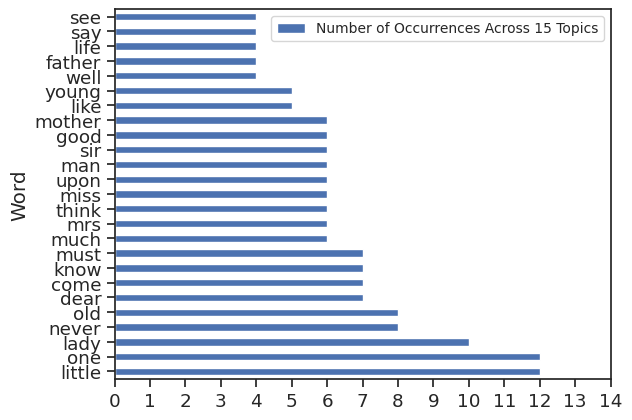

In [ ]:
# Sources:
# Lima, D. (2020). Set the legend location of a pandas plot. Stack Overflow. https://stackoverflow.com/questions/59791884/set-the-legend-location-of-a-pandas-plot
# farenorth. (2016). How to set ax.legend fontsize? [duplicate]. Stack Overflow. https://stackoverflow.com/questions/35652711/how-to-set-ax-legend-fontsize
df = pd.DataFrame({'Word': words[:25], 'Number of Occurrences Across 15 Topics': num_occurrences[:25]})
ax = df.plot.barh(x='Word', y='Number of Occurrences Across 15 Topics', rot=0)
ax.legend(loc='upper right', prop=dict(size=10))
ax.set_xticks(np.arange(0,15,1))

In [ ]:
d_2 = {}
for topic in topics_male:
  for word in topic:
    d_2[word] = d_2.get(word, 0) + 1
print(d_2)

{'one': 11, 'know': 5, 'think': 2, 'well': 7, 'much': 2, 'say': 4, 'good': 5, 'see': 8, 'little': 5, 'like': 12, 'must': 4, 'mrs': 4, 'time': 6, 'might': 3, 'lady': 2, 'made': 3, 'thought': 2, 'never': 4, 'miss': 2, 'way': 2, 'upon': 4, 'thou': 1, 'thee': 1, 'thy': 1, 'king': 1, 'man': 12, 'horn': 1, 'prince': 1, 'shall': 2, 'exclaimed': 1, 'lord': 5, 'father': 6, 'master': 1, 'house': 4, 'inglesant': 1, 'old': 9, 'money': 2, 'clare': 1, 'tom': 1, 'mark': 2, 'come': 4, 'iphis': 1, 'take': 1, 'mother': 2, 'lapham': 1, 'put': 1, 'sir': 6, 'colonel': 1, 'mary': 1, 'ethert': 1, 'ivy': 1, 'edward': 1, 'armitage': 1, 'bellarmin': 1, 'saxon': 1, 'hilda': 1, 'hubert': 1, 'bramton': 1, 'farquhar': 1, 'jesse': 1, 'isabel': 1, 'horse': 1, 'quite': 1, 'two': 4, 'madge': 1, 'ship': 1, 'sea': 1, 'captain': 1, 'though': 2, 'water': 1, 'boat': 1, 'deck': 1, 'men': 4, 'island': 1, 'wind': 1, 'came': 3, 'yolande': 1, 'says': 1, 'hugh': 1, 'adela': 1, 'robin': 1, 'dene': 1, 'marcella': 1, 'herbert': 1, '

In [ ]:
ordered_d_2 = dict(reversed(sorted(d_2.items(), key=lambda x:x[1])))

words_2 = []
num_occurrences_2 = []
for word in ordered_d_2:
  words_2.append(word)
  num_occurrences_2.append(d_2[word])

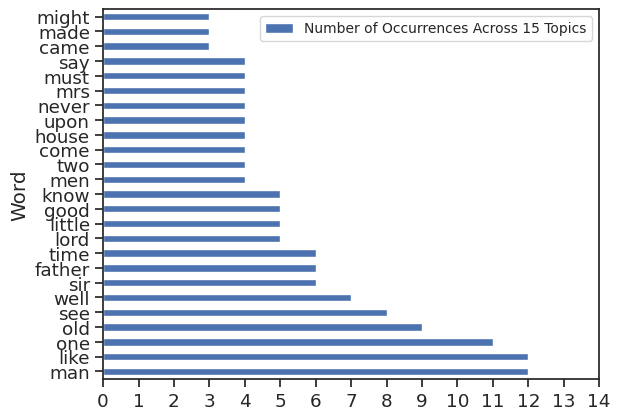

In [ ]:
df = pd.DataFrame({'Word': words_2[:25], 'Number of Occurrences Across 15 Topics': num_occurrences_2[:25]})
ax = df.plot.barh(x='Word', y='Number of Occurrences Across 15 Topics', rot=0)
ax.legend(loc='upper right', prop=dict(size=10))
ax.set_xticks(np.arange(0,15,1))

In [ ]:
print(little_mallet_wrapper.get_js_divergence_topics(7, 10, topic_weights_female))
print(little_mallet_wrapper.get_js_divergence_topics(10, 11, topic_weights_female))
print(little_mallet_wrapper.get_js_divergence_topics(7, 11, topic_weights_female))

0.6373851418291412
0.6254547233810142
0.584088657889758


In [ ]:
print(little_mallet_wrapper.get_js_divergence_topics(2, 12, topic_weights_male))

0.6231963498453682
